In [12]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
pd.set_option("display.max_columns",None)
# pd.set_option("display.max_rows",None)
from scipy.stats import shapiro,mannwhitneyu,chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
# from sklearn.tree import export_graphviz
import imblearn


from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std


import warnings 
warnings.filterwarnings('ignore')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

In [15]:
df = pd.read_csv('C:/Users/nabee/Desktop/CIND 820/dffinal.csv')
dfwork = df.copy()

In [16]:
#Splitting Train and Test Data Set
y = dfwork['Revenue']
x = dfwork.drop(['Revenue'], axis = 1)

# checking the shapes
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x:  (12330, 51)
Shape of y:  (12330,)
Shape of x_train : (9864, 51)
Shape of y_train : (9864,)
Shape of x_test : (2466, 51)
Shape of y_test : (2466,)


In [17]:
# Min Max Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()    
scaler.fit(x_train)       
x_train = scaler.transform(x_train)    
x_test = scaler.transform(x_test)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [19]:
rusd = RandomUnderSampler(sampling_strategy = 0.6 ,random_state = 0)

In [20]:
x_train, y_train = rusd.fit_resample(x_train, y_train)

In [21]:
print(x_train.shape,y_train.shape)
print("After UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train == 0)))

(3962, 51) (3962,)
After UnderSampling, counts of label '1': 1486
After UnderSampling, counts of label '0': 2476


In [26]:
# fitting models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

LR = LogisticRegression().fit(x_train, y_train)
y_pred_lr = LR.predict(x_test)

rf = RandomForestClassifier().fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

dt = DecisionTreeClassifier().fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

svc = SVC().fit(x_train,y_train)
y_pred_svm = svc.predict(x_test)

ada = AdaBoostClassifier().fit(x_train,y_train)
y_pred_ada = ada.predict(x_test)

gbc = GradientBoostingClassifier().fit(x_train,y_train)
y_pred_gbc = gbc.predict(x_test)

gb = xgb.XGBClassifier().fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)

In [11]:
# K Fold Cross Validation
def cv_comparison(models, X, y, cv = model_selection.RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()

    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        recalls = cross_val_score(model, x_train, y_train, scoring='recall', cv=cv)
        recall_score = np.mean(recalls).round(2)
        precisions = cross_val_score(model, x_train, y_train, scoring='precision', cv=cv)
        precision_score = np.mean(precisions).round(2)
        accuracies = cross_val_score(model, x_train,y_train, scoring='accuracy', cv=cv)
        accuracy_score = np.mean(accuracies).round(2)
        aucs = cross_val_score(model, x_train,y_train, scoring='roc_auc', cv=cv)
        auc_score = np.mean(aucs).round(2)
        f1s = cross_val_score(model, x_train,y_train, scoring='f1', cv=cv)
        f1_score = np.mean(accuracies).round(2)
        cv_accuracies[str(model).split('(')[0]] = [ accuracy_score, precision_score, recall_score, auc_score, f1_score]
    cv_accuracies.index = ['Accuracy','Precision','Recall',  'AUC','F1']
    result = cv_accuracies.transpose()
    return result
    # return cv_accuracies

In [23]:
LR = LogisticRegression() 
RF = RandomForestClassifier()
DT = DecisionTreeClassifier()
NB = GaussianNB()
SV = SVC()
AD = AdaBoostClassifier()
GB = GradientBoostingClassifier()
XG = xgb.XGBClassifier()
models = [LR,RF,DT,SV,AD,GB,XG]

In [24]:
import pandas as pd
cv_comparison(models, x_train, y_train)

NameError: name 'cv_comparison' is not defined

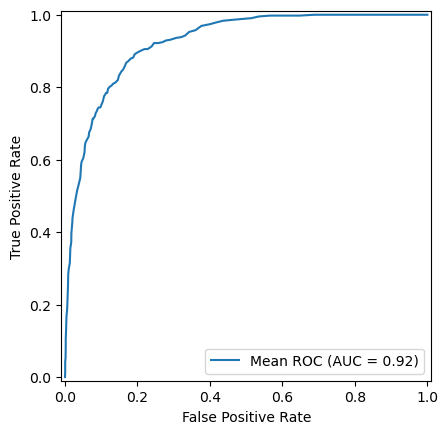

In [27]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, e.predict_proba(x_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Mean ROC')
display.plot()  # doctest: +SKIP
plt.show()      # doctest: +SKIP